## 6-7. 다층 퍼셉트론으로 손글씨 분류하기
### 1. 숫자 필기 데이터 소개
숫자 필기 데이터는 사이킷런 패키지에서 제공하는 분류용 예제 데이터임. 0 ~ 9까지 손으로 쓴 이미지 데이터. load_digits() 명령으로 로드할 수 있다. 각 이미지는 0 ~ 15까지의 명암을 가지는 8x8=64 픽셀 해상도의 흑백 이미지임. 해당 이미지가 1,797개 있다.

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt #시각화를 위한 맷플롯립
from sklearn.datasets import load_digits
digits = load_digits()

In [4]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


0을 흰색 도화지, 0보다 큰 숫자들을 검은색 점이라고 상상해보면 숫자 0의 실루엣처럼 보임

In [5]:
print (digits.target[0])

0


In [6]:
print('전체 샘플의 수: {}'.format(len(digits.images)))

전체 샘플의 수: 1797


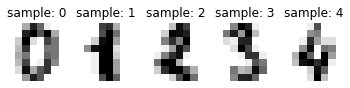

In [7]:
# 전체 샘플 1797개 중 상위 5개의 샘플만 시각화
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:5]): #5개의 샘플만 출력
    plt.subplot(2, 5, index +1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('sample: %i' % label)

In [8]:
for i in range(5):
    print(i, '번 인덱스 샘플의 레이블: ', digits.target[i])

0 번 인덱스 샘플의 레이블:  0
1 번 인덱스 샘플의 레이블:  1
2 번 인덱스 샘플의 레이블:  2
3 번 인덱스 샘플의 레이블:  3
4 번 인덱스 샘플의 레이블:  4


In [10]:
# 훈련 데이터와 레이블을 각각 X, Y에 저장
# digits.data 함수는 8x8행렬을 64차원의 벡터로 변환한 형태임.
print(digits.data[0])
X = digits.data   #이미지. 즉, 특성 행렬
Y = digits.target #각 이미지에 대한 레이블

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


### 2. 다층 퍼셉트론 분류기 만들기

In [11]:
import torch
import torch.nn as nn
from torch import optim

In [13]:
model = nn.Sequential(
    nn.Linear(64, 32), #input_layer = 64, hidden_layer1 = 32
    nn.ReLU(),
    nn.Linear(32, 16), #hidden_layer1 = 32, hidden_layer2 = 16
    nn.ReLU(),
    nn.Linear(16, 10)  #hidden_layer2 = 16, output_layer = 10
)

In [14]:
X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.int64)

In [15]:
loss_fn = nn.CrossEntropyLoss() #이 비용함수는 소프트맥스 함수를 포함하고 있음

In [16]:
optimizer = optim.Adam(model.parameters())

In [19]:
losses = []

In [21]:
for epoch in range(100):
    optimizer.zero_grad()
    y_pred = model(X) # forward연산
    loss = loss_fn(y_pred, Y)
    loss.backward()
    optimizer.step()
    
    if epoch % 10 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, 100, loss.item()))
              
    losses.append(loss.item())

Epoch    0/100 Cost: 2.644159
Epoch   10/100 Cost: 2.185431
Epoch   20/100 Cost: 1.983278
Epoch   30/100 Cost: 1.720703
Epoch   40/100 Cost: 1.451564
Epoch   50/100 Cost: 1.176492
Epoch   60/100 Cost: 0.900471
Epoch   70/100 Cost: 0.651608
Epoch   80/100 Cost: 0.459725
Epoch   90/100 Cost: 0.338111


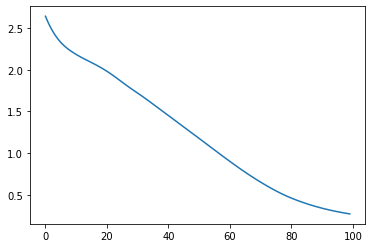

In [22]:
plt.plot(losses)

## 6-8. 다층 퍼셉트론으로 MNIST 분류하기
5장 소프트맥스 회귀에서 입력층과 출력층만 존재하는 단층 퍼셉트론에서 소프트맥스 함수를 활성화 함수로 사용하였음. <br>
이번 챕터에서는 은닉층을 추가로 넣어 다층 퍼셉트론 구현
### 1. 데이터 로드하기

In [9]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
from sklearn.datasets import fetch_openml

In [28]:
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False) 

In [29]:
mnist.data[0] # KeyError: 0 as_frame=False추가 오류 해결

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [31]:
mnist.target[0]

'5'

In [32]:
mnist.target = mnist.target.astype(np.int8)

In [36]:
X = mnist.data / 255 #0~255값을 [0,1]구간으로 정규화
y = mnist.target

In [37]:
X[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [38]:
y[0]

5

이 이미지 데이터의 레이블은 5이다.


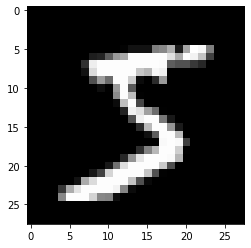

In [39]:
plt.imshow(X[0].reshape(28,28), cmap='gray')
print('이 이미지 데이터의 레이블은 {:.0f}이다.'.format(y[0]))

### 2. 훈련 데이터와 테스트 데이터의 분리

In [40]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=1/7, random_state=0)

X_train = torch.Tensor(X_train)
X_test = torch.Tensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

ds_train = TensorDataset(X_train, y_train)
ds_test = TensorDataset(X_test, y_test)

loader_train = DataLoader(ds_train, batch_size=64, shuffle=True)
loader_test = DataLoader(ds_test, batch_size=64, shuffle=False)

### 3. 다층 퍼셉트론

In [42]:
from torch import nn

model = nn.Sequential()
model.add_module('fc1', nn.Linear(28*28*1, 100))
model.add_module('relu1', nn.ReLU())
model.add_module('fc2', nn.Linear(100, 100))
model.add_module('relu2', nn.ReLU())
model.add_module('fc3', nn.Linear(100, 10))

print(model)

Sequential(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)


In [43]:
from torch import optim

#오차함수 선택
loss_fn = nn.CrossEntropyLoss()

#가중치를 학습하기 위한 최적화 기법 선택
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [44]:
def train(epoch):
    model.train() #신경망을 학습 모드로 전환
    
    #데이터로더에서 미니배치를 하나씩 꺼내 학습을 수행
    for data, targets in loader_train:
        optimizer.zero_grad() #경사를 0으로 초기화
        outputs = model(data) #데이터를 입력하고 출력을 계산
        loss = loss_fn(outputs, targets) #출력과 훈련 데이터 정답 간의 오차를 계산
        loss.backward()  #오차를 역전파 계산
        optimizer.step() #역전파 계산한 값으로 가중치를 수정
        
    print("epoch{}: 완료\n".format(epoch))

In [45]:
def test():
    model.eval() #신경망을 추론 모드로 전환
    correct = 0
    
    #데이터로더에서 미니배치를 하나씩 꺼내 추론을 수행
    with torch.no_grad(): #추론 과정에는 미분이 필요 없음
        for data, targets in loader_test:
            outputs = model(data) #데이터를 입력하고 출력을 계산
            
            #추론 계산
            _, predicted = torch.max(outputs.data, 1) #확률이 가장 높은 레이블이 무엇인지 계산
            correct += predicted.eq(targets.data.view_as(predicted)).sum() #정답과 일치한 경우 정답 카운트를 증가
            
            #정확도 출력
            data_num = len(loader_test.dataset) #데이터 총 건수
            print('\n테스트 데이터에서 예측 정확도: {}/{} ({:.0f}%)\n'.format(correct, data_num, 100.*correct/data_num))

In [46]:
test()


테스트 데이터에서 예측 정확도: 2/10000 (0%)


테스트 데이터에서 예측 정확도: 9/10000 (0%)


테스트 데이터에서 예측 정확도: 17/10000 (0%)


테스트 데이터에서 예측 정확도: 30/10000 (0%)


테스트 데이터에서 예측 정확도: 40/10000 (0%)


테스트 데이터에서 예측 정확도: 53/10000 (1%)


테스트 데이터에서 예측 정확도: 65/10000 (1%)


테스트 데이터에서 예측 정확도: 71/10000 (1%)


테스트 데이터에서 예측 정확도: 73/10000 (1%)


테스트 데이터에서 예측 정확도: 83/10000 (1%)


테스트 데이터에서 예측 정확도: 94/10000 (1%)


테스트 데이터에서 예측 정확도: 107/10000 (1%)


테스트 데이터에서 예측 정확도: 116/10000 (1%)


테스트 데이터에서 예측 정확도: 121/10000 (1%)


테스트 데이터에서 예측 정확도: 133/10000 (1%)


테스트 데이터에서 예측 정확도: 139/10000 (1%)


테스트 데이터에서 예측 정확도: 150/10000 (2%)


테스트 데이터에서 예측 정확도: 160/10000 (2%)


테스트 데이터에서 예측 정확도: 167/10000 (2%)


테스트 데이터에서 예측 정확도: 169/10000 (2%)


테스트 데이터에서 예측 정확도: 177/10000 (2%)


테스트 데이터에서 예측 정확도: 181/10000 (2%)


테스트 데이터에서 예측 정확도: 187/10000 (2%)


테스트 데이터에서 예측 정확도: 194/10000 (2%)


테스트 데이터에서 예측 정확도: 202/10000 (2%)


테스트 데이터에서 예측 정확도: 210/10000 (2%)


테스트 데이터에서 예측 정확도: 214/10000 (2%)


테스트 데이터에서 예측 정확도: 219/10000 (2%)


테스트 데이터에서 예측 정확도: 227/10000 (2%)

In [47]:
for epoch in range(3): #세번의 train 후 test 결과 확인
    train(epoch)
    
test()

epoch0: 완료

epoch1: 완료

epoch2: 완료


테스트 데이터에서 예측 정확도: 63/10000 (1%)


테스트 데이터에서 예측 정확도: 125/10000 (1%)


테스트 데이터에서 예측 정확도: 187/10000 (2%)


테스트 데이터에서 예측 정확도: 248/10000 (2%)


테스트 데이터에서 예측 정확도: 309/10000 (3%)


테스트 데이터에서 예측 정확도: 371/10000 (4%)


테스트 데이터에서 예측 정확도: 429/10000 (4%)


테스트 데이터에서 예측 정확도: 493/10000 (5%)


테스트 데이터에서 예측 정확도: 552/10000 (6%)


테스트 데이터에서 예측 정확도: 615/10000 (6%)


테스트 데이터에서 예측 정확도: 668/10000 (7%)


테스트 데이터에서 예측 정확도: 728/10000 (7%)


테스트 데이터에서 예측 정확도: 789/10000 (8%)


테스트 데이터에서 예측 정확도: 851/10000 (9%)


테스트 데이터에서 예측 정확도: 911/10000 (9%)


테스트 데이터에서 예측 정확도: 971/10000 (10%)


테스트 데이터에서 예측 정확도: 1033/10000 (10%)


테스트 데이터에서 예측 정확도: 1096/10000 (11%)


테스트 데이터에서 예측 정확도: 1158/10000 (12%)


테스트 데이터에서 예측 정확도: 1222/10000 (12%)


테스트 데이터에서 예측 정확도: 1285/10000 (13%)


테스트 데이터에서 예측 정확도: 1343/10000 (13%)


테스트 데이터에서 예측 정확도: 1406/10000 (14%)


테스트 데이터에서 예측 정확도: 1467/10000 (15%)


테스트 데이터에서 예측 정확도: 1525/10000 (15%)


테스트 데이터에서 예측 정확도: 1588/10000 (16%)


테스트 데이터에서 예측 정확도: 1650/10000 (16%

예측 결과: 2
이 이미지 데이터의 정답 레이블은 2입니다


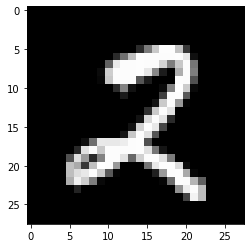

In [48]:
index = 2018

model.eval() #신경망을 추론 모드로 전환
data = X_test[index]
output = model(data) #데이터를 입력하고 출력을 계산
_, predicted = torch.max(output.data, 0) #확률이 가장 높은 레이블이 무엇인지 계산


print("예측 결과: {}".format(predicted))

X_test_show = (X_test[index]).numpy()
plt.imshow(X_test_show.reshape(28, 28), cmap='gray')
print('이 이미지 데이터의 정답 레이블은 {:.0f}입니다'.format(y_test[index]))